<a href="https://colab.research.google.com/github/Fujisupakon/pharma-sales-prediction/blob/main/new_pipeline_forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv('pharma-data.csv')

In [ ]:
df.head()

,Distributor,Customer Name,City,Country,Latitude,Longitude,Channel,Sub-channel,Product Name,Product Class,Quantity,Price,Sales,Month,Year,Name of Sales Rep,Manager,Sales Team
0,Gottlieb-Cruickshank,"Zieme, Doyle and Kunze",Lublin,Poland,51.2333,22.5667,Hospital,Private,Topipizole,Mood Stabilizers,4.0,368.0,1472.0,January,2018.0,Mary Gerrard,Britanny Bold,Delta
1,Gottlieb-Cruickshank,Feest PLC,Świecie,Poland,53.4167,18.4333,Pharmacy,Retail,Choriotrisin,Antibiotics,7.0,591.0,4137.0,January,2018.0,Jessica Smith,Britanny Bold,Delta
2,Gottlieb-Cruickshank,Medhurst-Beer Pharmaceutical Limited,Rybnik,Poland,50.0833,18.5000,Pharmacy,Institution,Acantaine,Antibiotics,30.0,66.0,1980.0,January,2018.0,Steve Pepple,Tracy Banks,Bravo
3,Gottlieb-Cruickshank,Barton Ltd Pharma Plc,Czeladź,Poland,50.3333,19.0833,Hospital,Private,Lioletine Refliruvax,Analgesics,6.0,435.0,2610.0,January,2018.0,Mary Gerrard,Britanny Bold,Delta
4,Gottlieb-Cruickshank,Keeling LLC Pharmacy,Olsztyn,Poland,53.7800,20.4942,Pharmacy,Retail,Oxymotroban Fexoformin,Analgesics,20.0,458.0,9160.0,January,2018.0,Anne Wu,Britanny Bold,Delta


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167760 entries, 0 to 167759
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Distributor        167760 non-null  object 
 1   Customer Name      167760 non-null  object 
 2   City               167760 non-null  object 
 3   Country            167760 non-null  object 
 4   Latitude           167760 non-null  float64
 5   Longitude          167760 non-null  float64
 6   Channel            167760 non-null  object 
 7   Sub-channel        167760 non-null  object 
 8   Product Name       167760 non-null  object 
 9   Product Class      167759 non-null  object 
 10  Quantity           167759 non-null  float64
 11  Price              167759 non-null  float64
 12  Sales              167759 non-null  float64
 13  Month              167759 non-null  object 
 14  Year               167759 non-null  float64
 15  Name of Sales Rep  167759 non-null  object 
 16  Ma

In [ ]:
df = df.dropna(subset=['Sales'])

In [ ]:
#choose feature
features = ['Quantity', 'Price', 'Month', 'Year', 'Product Class','Product Name']

x = df[features]
y = df['Sales']

In [ ]:
print(y.isna().sum())

0


In [ ]:
#preprocessing
categorical = x.select_dtypes(include=['object']).columns.tolist()
numeric = x.select_dtypes(include=['int64','float64']).columns.tolist()

preprocess = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical),
        ('num', 'passthrough', numeric)
    ]
)

In [ ]:
#pipeline
model = Pipeline(steps=[('preprocess',preprocess),
 ('regressor', RandomForestRegressor())])

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

In [ ]:
model.fit(x_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Month', 'Product Class',
                                                   'Product Name']),
                                                 ('num', 'passthrough',
                                                  ['Quantity', 'Price',
                                                   'Year'])])),
                ('regressor', RandomForestRegressor())])

In [ ]:
# 8. Evaluate
pred = model.predict(x_test)

mae = mean_absolute_error(y_test, pred)
rmse = np.sqrt(mean_squared_error(y_test, pred))
r2 = r2_score(y_test, pred)

In [ ]:
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")

MAE: 817.08
RMSE: 26824.48
R²: 0.99


# **Graph**

In [ ]:
historical_results = x_test.copy()
historical_results['Label'] = historical_results['Month'].astype(str) + '-' + historical_results['Year'].astype(str)
historical_results['Actual_Sales'] = y_test.values
historical_results['Predicted_Sales'] = pred

In [ ]:
month_order = ['January','February','March','April','May','June',
               'July','August','September','October','November','December']

df['Month'] = pd.Categorical(df['Month'], categories=month_order, ordered=True)
df = df.sort_values(['Year','Month'])

In [ ]:
df.head()

,Distributor,Customer Name,City,Country,Latitude,Longitude,Channel,Sub-channel,Product Name,Product Class,Quantity,Price,Sales,Month,Year,Name of Sales Rep,Manager,Sales Team
40484,Gerlach LLC,Fadel-West Pharmacy,Ditzingen,Germany,48.8264,9.0667,Hospital,Government,Exotropin Empizine,Mood Stabilizers,20.0,785.0,15700.0,January,2017.0,Sheila Stones,Britanny Bold,Delta
40485,Gerlach LLC,Nader-Gaylord Pharmacy,Backnang,Germany,48.9464,9.4306,Hospital,Private,Robapril,Antipiretics,10.0,453.0,4530.0,January,2017.0,Stella Given,Alisha Cordwell,Charlie
40486,Gerlach LLC,McKenzie-Zemlak Pharm,Rheinbach,Germany,50.6256,6.9491,Pharmacy,Institution,Secrelazine Insonamic,Antipiretics,25.0,694.0,17350.0,January,2017.0,Daniel Gates,Alisha Cordwell,Charlie
40487,Gerlach LLC,Fritsch-Hauck Pharmaceutical Ltd,Fürth,Germany,49.4783,10.9903,Pharmacy,Retail,Megenorphine,Antimalarial,5.0,402.0,2010.0,January,2017.0,Mary Gerrard,Britanny Bold,Delta
40488,Gerlach LLC,"Bernier, Murphy and Rau Pharma Plc",Geldern,Germany,51.5197,6.3325,Hospital,Government,Agalsiline,Mood Stabilizers,20.0,64.0,1280.0,January,2017.0,Mary Gerrard,Britanny Bold,Delta


In [ ]:
last_year = df['Year'].iloc[-1]
last_month = df['Month'].iloc[-1]

In [ ]:
future_months = []
future_years = []

current_year = last_year
current_month_index = month_order.index(last_month)

In [ ]:
for i in range(6):
    next_month_index = (current_month_index + 1) % 12
    if next_month_index == 0:
        current_year += 1
    current_month = month_order[next_month_index]

    future_months.append(current_month)
    future_years.append(current_year)
    current_month_index = next_month_index

In [ ]:
# use averages as placeholder for future features
avg_quantity = df['Quantity'].mean()
avg_price = df['Price'].mean()
common_class = df['Product Class'].mode()[0]
common_product = df['Product Name'].mode()[0]

future_df = pd.DataFrame({
    'Quantity': [avg_quantity]*6,
    'Price': [avg_price]*6,
    'Month': future_months,
    'Year': future_years,
    'Product Class': [common_class]*6,
    'Product Name': [common_product]*6
})

future_df['Label'] = future_df['Month'].astype(str) + '-' + future_df['Year'].astype(str)

In [ ]:
future_df.head()

,Quantity,Price,Month,Year,Product Class,Product Name,Label,Predicted_Sales
0,102.301291,412.390203,May,2019.0,Antiseptics,Acantaine,May-2019.0,41769.50
1,102.301291,412.390203,June,2019.0,Antiseptics,Acantaine,June-2019.0,41782.06
2,102.301291,412.390203,July,2019.0,Antiseptics,Acantaine,July-2019.0,41769.50
3,102.301291,412.390203,August,2019.0,Antiseptics,Acantaine,August-2019.0,41769.50
4,102.301291,412.390203,September,2019.0,Antiseptics,Acantaine,September-2019.0,41769.50


In [ ]:
# predict future sales
future_df['Predicted_Sales'] = model.predict(future_df)

In [ ]:
future_df.head()

,Quantity,Price,Month,Year,Product Class,Product Name,Label,Predicted_Sales
0,102.301291,412.390203,May,2019.0,Antiseptics,Acantaine,May-2019.0,41769.50
1,102.301291,412.390203,June,2019.0,Antiseptics,Acantaine,June-2019.0,41782.06
2,102.301291,412.390203,July,2019.0,Antiseptics,Acantaine,July-2019.0,41769.50
3,102.301291,412.390203,August,2019.0,Antiseptics,Acantaine,August-2019.0,41769.50
4,102.301291,412.390203,September,2019.0,Antiseptics,Acantaine,September-2019.0,41769.50


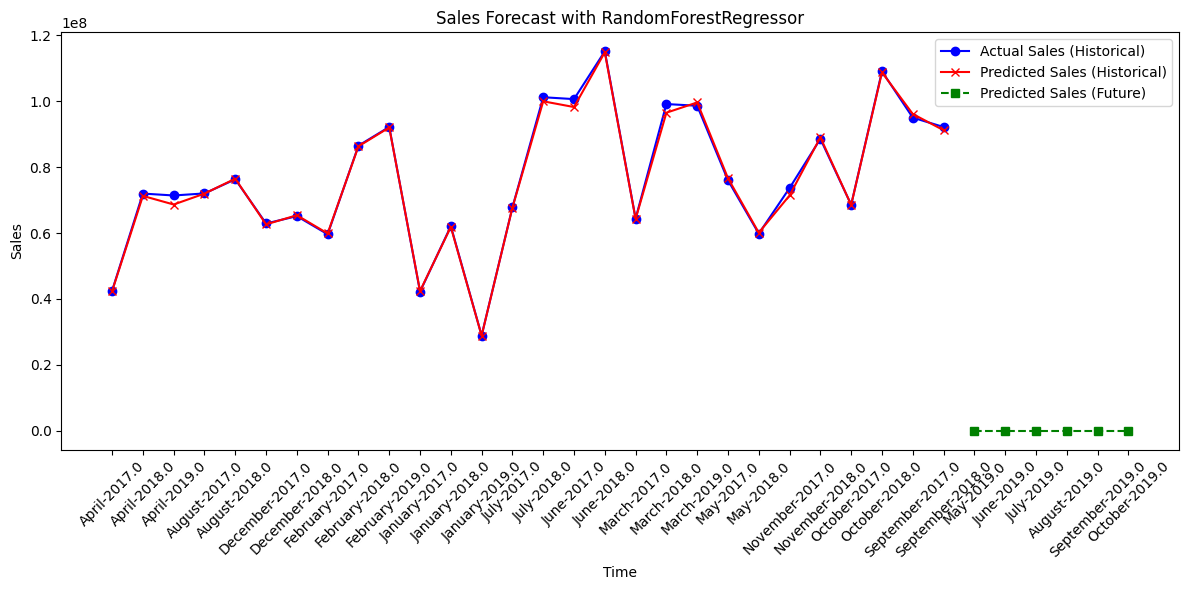

In [ ]:
# Aggregate historical actual and predicted by Month-Year
historical_results_agg = historical_results.groupby('Label')[['Actual_Sales', 'Predicted_Sales']].sum().reset_index()

future_df_agg = future_df[['Label', 'Predicted_Sales']]

# Plot
plt.figure(figsize=(12,6))

plt.plot(historical_results_agg['Label'], historical_results_agg['Actual_Sales'],
         label='Actual Sales (Historical)', color='blue', marker='o')
plt.plot(historical_results_agg['Label'], historical_results_agg['Predicted_Sales'],
         label='Predicted Sales (Historical)', color='red', marker='x')
plt.plot(future_df_agg['Label'], future_df_agg['Predicted_Sales'],
         label='Predicted Sales (Future)', color='green', linestyle='--', marker='s')

plt.xticks(rotation=45)
plt.xlabel("Time")
plt.ylabel("Sales")
plt.title("Sales Forecast with RandomForestRegressor")
plt.legend()
plt.tight_layout()
plt.show()
